In [11]:
!pip install requests pandas


In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Function to fetch and parse RSS feed
def fetch_rss_feed(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')

    articles = []
    for item in soup.find_all('item'):
        articles.append({
            'Title': item.title.text,
            'Link': item.link.text,
            'Published_Date': item.pubDate.text,
            'Description': item.description.text
        })

    return pd.DataFrame(articles)

# URL for the NYT World News RSS feed (replace with a different feed if needed)
rss_url = "https://rss.nytimes.com/services/xml/rss/nyt/World.xml"

# Fetch and display articles
nyt_rss_data = fetch_rss_feed(rss_url)
print(nyt_rss_data.head())

# Save to CSV
nyt_rss_data.to_csv("nyt_rss_articles.csv", index=False)


                                               Title  \
0  Senior U.S. Diplomats in Syria to Meet With Go...   
1  Trump Tariffs? Europe Braces but Has No Clear ...   
2  During Pelicot Trial, Avignon’s Ramparts Give ...   
3  Coke, Pepsi and Other U.S. Companies Face Wall...   
4  Australia Targets China’s Influence With Deals...   

                                                Link  \
0  https://www.nytimes.com/2024/12/20/us/politics...   
1  https://www.nytimes.com/2024/12/20/world/europ...   
2  https://www.nytimes.com/2024/12/20/world/europ...   
3  https://www.nytimes.com/2024/12/20/world/asia/...   
4  https://www.nytimes.com/2024/12/20/world/austr...   

                    Published_Date  \
0  Fri, 20 Dec 2024 15:11:12 +0000   
1  Fri, 20 Dec 2024 08:22:55 +0000   
2  Fri, 20 Dec 2024 10:10:59 +0000   
3  Fri, 20 Dec 2024 10:50:36 +0000   
4  Fri, 20 Dec 2024 16:01:07 +0000   

                                         Description  
0  The U.S. officials planned to discuss g

In [24]:
import nltk
nltk.download('punkt')  # Ensure punkt is properly downloaded
nltk.download('stopwords')  # Ensure stopwords are available
nltk.download('wordnet')  # Ensure wordnet is available


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
nltk.data.clear_cache()


In [27]:
import nltk
print(nltk.data.find('tokenizers/punkt'))


/root/nltk_data/tokenizers/punkt


In [28]:
import shutil
nltk_data_path = nltk.data.find('tokenizers/punkt')
shutil.rmtree(str(nltk_data_path))
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
import nltk

# Force download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional for lemmatization if required


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [31]:
import os

# Check for punkt files in nltk_data directory
nltk_data_path = os.path.join(nltk.data.path[0], 'tokenizers', 'punkt')
print("Checking NLTK punkt directory:", nltk_data_path)
print("Directory exists:", os.path.exists(nltk_data_path))
print("Files in directory:", os.listdir(nltk_data_path) if os.path.exists(nltk_data_path) else "Directory not found")


Checking NLTK punkt directory: /root/nltk_data/tokenizers/punkt
Directory exists: False
Files in directory: Directory not found


In [33]:
!pip install spacy

import spacy
from spacy.lang.en import English
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load spaCy tokenizer
nlp = English()

def clean_text_spacy(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply cleaning with spaCy tokenizer
nyt_rss_data['Cleaned_Description'] = nyt_rss_data['Description'].apply(clean_text_spacy)
print(nyt_rss_data[['Description', 'Cleaned_Description']].head())


                                         Description  \
0  The U.S. officials planned to discuss governan...   
1  The incoming president promised “tariffs all t...   
2  A feminist collective, the Amazons of Avignon,...   
3  Pension funds and big investors are pressuring...   
4  In separate agreements with Nauru, Papua New G...   

                                 Cleaned_Description  
0  u official planned discus governance look sign...  
1  incoming president promised tariff way unless ...  
2  feminist collective amazon avignon plastering ...  
3  pension fund big investor pressuring cocacola ...  
4  separate agreement nauru papua new guinea solo...  


In [34]:
from textblob import TextBlob

# Function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
nyt_rss_data['Sentiment'] = nyt_rss_data['Cleaned_Description'].apply(analyze_sentiment)
print(nyt_rss_data['Sentiment'].value_counts())


Sentiment
Neutral     21
Positive    19
Negative    17
Name: count, dtype: int64


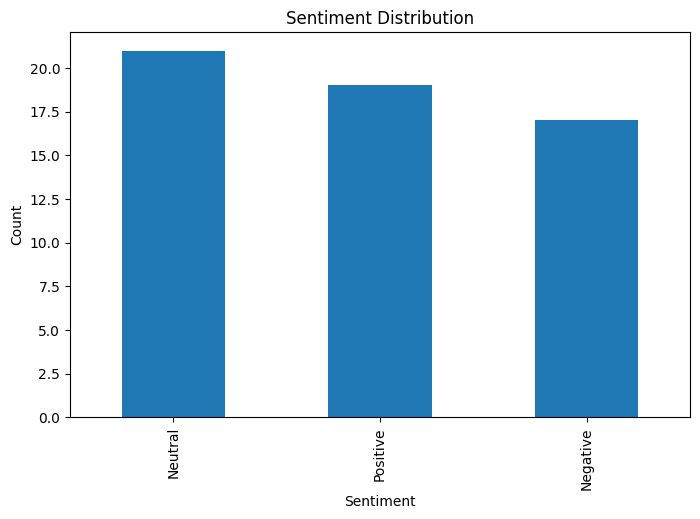

In [35]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
nyt_rss_data['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution', figsize=(8, 5))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


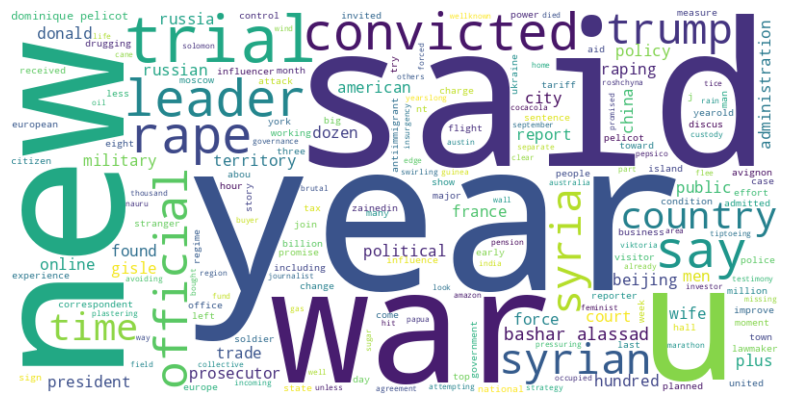

In [36]:
from wordcloud import WordCloud

# Generate word cloud from cleaned descriptions
text = ' '.join(nyt_rss_data['Cleaned_Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
nyt_rss_data.to_csv("processed_nyt_rss_data.csv", index=False)
print("Processed data saved to processed_nyt_rss_data.csv")


Processed data saved to processed_nyt_rss_data.csv


In [38]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

def topic_modeling(data, num_topics=5):
    tokens = [text.split() for text in data]
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    return lda_model.show_topics()

topics = topic_modeling(nyt_rss_data['Cleaned_Description'])
print(topics)


[(0, '0.012*"year" + 0.008*"political" + 0.008*"france" + 0.008*"zainedin" + 0.008*"abou" + 0.008*"war" + 0.008*"prosecutor" + 0.008*"toward" + 0.008*"working" + 0.004*"u"'), (1, '0.014*"said" + 0.007*"leader" + 0.007*"pelicot" + 0.007*"tax" + 0.007*"visitor" + 0.007*"dominique" + 0.007*"wife" + 0.007*"raping" + 0.007*"here" + 0.007*"early"'), (2, '0.012*"new" + 0.008*"country" + 0.008*"try" + 0.008*"syria" + 0.008*"time" + 0.008*"reporter" + 0.008*"rape" + 0.008*"convicted" + 0.008*"u" + 0.008*"charge"'), (3, '0.012*"year" + 0.012*"military" + 0.009*"beijing" + 0.008*"trump" + 0.008*"russia" + 0.008*"found" + 0.008*"report" + 0.008*"administration" + 0.005*"syrian" + 0.005*"flight"'), (4, '0.009*"trade" + 0.009*"policy" + 0.006*"trial" + 0.006*"rape" + 0.006*"convicted" + 0.006*"said" + 0.006*"pelicot" + 0.006*"plus" + 0.006*"men" + 0.006*"gisle"')]


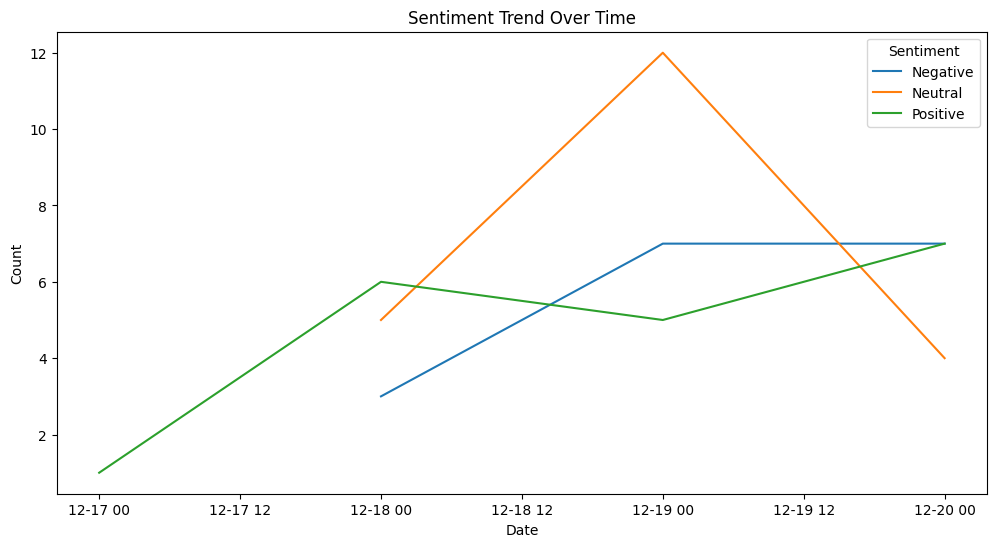

In [39]:
nyt_rss_data['Published_Date'] = pd.to_datetime(nyt_rss_data['Published_Date'])
sentiment_trend = nyt_rss_data.groupby(nyt_rss_data['Published_Date'].dt.date)['Sentiment'].value_counts().unstack()
sentiment_trend.plot(kind='line', figsize=(12, 6), title='Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


In [40]:
from textblob import TextBlob

# Function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to cleaned descriptions
nyt_rss_data['Sentiment'] = nyt_rss_data['Cleaned_Description'].apply(analyze_sentiment)

# Display sentiment counts
print(nyt_rss_data['Sentiment'].value_counts())


Sentiment
Neutral     21
Positive    19
Negative    17
Name: count, dtype: int64


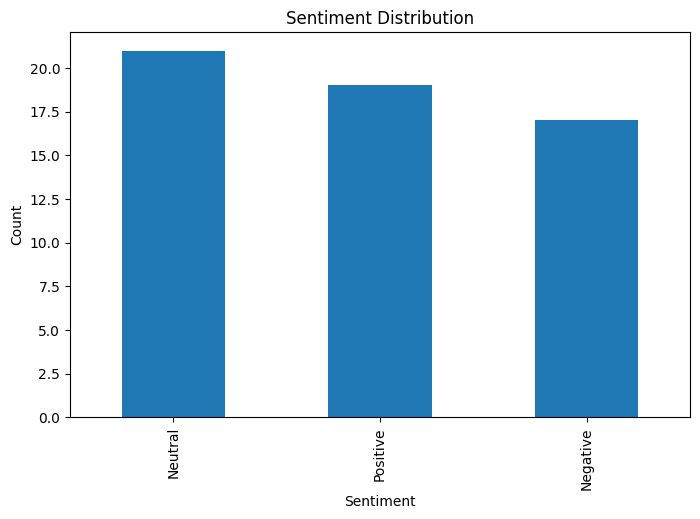

In [41]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
nyt_rss_data['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution', figsize=(8, 5))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


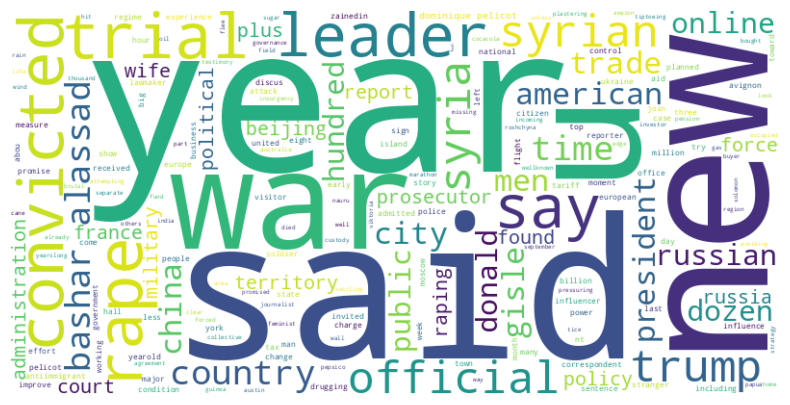

In [42]:
from wordcloud import WordCloud

# Generate word cloud
text = ' '.join(nyt_rss_data['Cleaned_Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [43]:
nyt_rss_data.to_csv("processed_nyt_rss_data.csv", index=False)
print("Processed data saved to processed_nyt_rss_data.csv")


Processed data saved to processed_nyt_rss_data.csv


In [44]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

# Function for topic modeling
def topic_modeling(data, num_topics=5):
    tokens = [text.split() for text in data]
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    return lda_model.show_topics()

# Display topics
topics = topic_modeling(nyt_rss_data['Cleaned_Description'])
print(topics)


[(0, '0.012*"syrian" + 0.008*"town" + 0.008*"correspondent" + 0.008*"soldier" + 0.008*"try" + 0.008*"territory" + 0.008*"government" + 0.005*"trade" + 0.005*"europe" + 0.005*"war"'), (1, '0.016*"year" + 0.012*"said" + 0.008*"syria" + 0.008*"u" + 0.008*"eight" + 0.008*"official" + 0.008*"american" + 0.008*"hour" + 0.005*"new" + 0.005*"influence"'), (2, '0.009*"trial" + 0.009*"policy" + 0.009*"said" + 0.009*"convicted" + 0.009*"pelicot" + 0.009*"rape" + 0.009*"raping" + 0.009*"wife" + 0.009*"dominique" + 0.006*"measure"'), (3, '0.007*"administration" + 0.007*"u" + 0.007*"year" + 0.007*"found" + 0.007*"political" + 0.007*"report" + 0.007*"left" + 0.007*"top" + 0.007*"nt" + 0.007*"abou"'), (4, '0.011*"say" + 0.011*"leader" + 0.008*"online" + 0.008*"force" + 0.008*"court" + 0.008*"tax" + 0.008*"influencer" + 0.008*"come" + 0.008*"attack" + 0.008*"said"')]


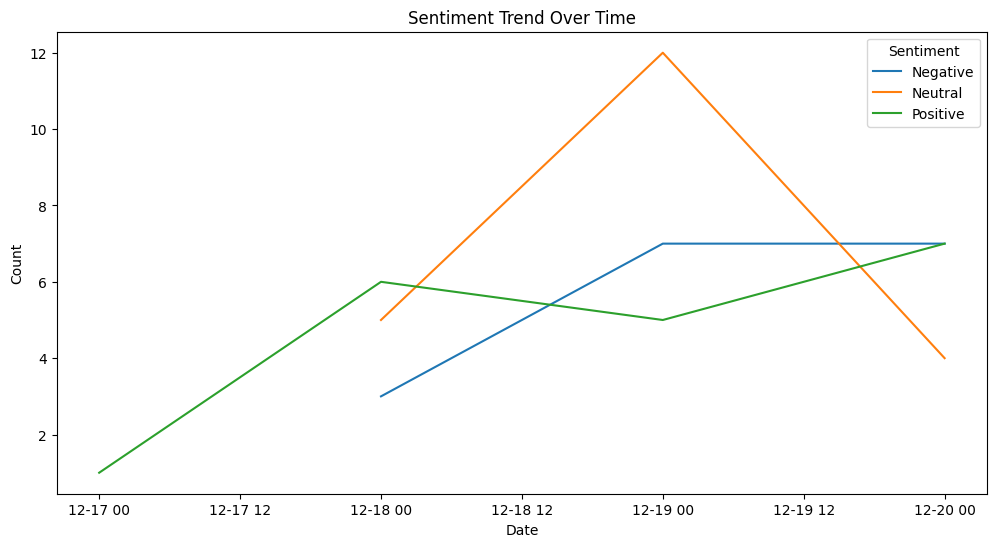

In [45]:
# Convert Published_Date to datetime format
nyt_rss_data['Published_Date'] = pd.to_datetime(nyt_rss_data['Published_Date'])

# Group data by date and sentiment
sentiment_trend = nyt_rss_data.groupby(nyt_rss_data['Published_Date'].dt.date)['Sentiment'].value_counts().unstack()

# Plot sentiment trends over time
sentiment_trend.plot(kind='line', figsize=(12, 6), title='Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()
